# ISLR sec 8-4 no 8

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('../Data/Carseats.csv')
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes


In [2]:
df = df.drop(['High'],axis=1)
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [3]:
# define categorical variables with order: Bad < Medium < Good.
df['ShelveLoc'] = df.ShelveLoc.astype('category')
df.ShelveLoc.cat.reorder_categories(['Bad','Medium','Good'],inplace=True)
df['Urban'] = df.Urban.astype('category')
df['US'] = df.US.astype('category')
df.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [4]:
# convert category labels to integers
df['ShelveLoc'] = df.ShelveLoc.cat.codes
df['Urban'] = df.Urban.cat.codes
df['US'] = df.US.cat.codes
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,0,42,17,1,1
2,11.22,111,48,16,260,83,2,65,10,1,1
3,10.06,113,35,10,269,80,1,59,12,1,1


### (a)

In [5]:
# split data
data = df.values
x = data[:,1:]
y = data[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### (b)

In [6]:
TR = DecisionTreeRegressor(max_depth=3)
TR.fit(x_train,y_train)
y_pred = TR.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
print('test MSE = %0.3f' % MSE)

test MSE = 4.379


In [7]:
with open('Carseats-regression.dot','w') as f:
    features = df.drop(['Sales'],axis=1).columns.values
    f = tree.export_graphviz(TR,out_file=f,
                             feature_names=features)

### (c)

In [8]:
for k in range(20):
    TR = DecisionTreeRegressor(max_depth=k+1)
    MSE = -1.0*cross_val_score(TR,x,y,cv=10,scoring='mean_squared_error').mean()
    print('%d  test MSE = %0.3f' % (k+1,MSE))

1  test MSE = 6.021
2  test MSE = 5.176
3  test MSE = 4.759
4  test MSE = 4.883
5  test MSE = 4.688
6  test MSE = 4.546
7  test MSE = 4.587
8  test MSE = 4.757
9  test MSE = 5.088
10  test MSE = 5.038
11  test MSE = 5.149
12  test MSE = 5.081
13  test MSE = 5.090
14  test MSE = 5.003
15  test MSE = 5.153
16  test MSE = 5.000
17  test MSE = 5.093
18  test MSE = 5.041
19  test MSE = 5.155
20  test MSE = 4.975


Optimal tree depth equals 6.

### (d)

In [9]:
# Bagging
BG = RandomForestRegressor(max_features=None)
MSE = -1.0*cross_val_score(BG,x,y,cv=10,scoring='mean_squared_error').mean()
print('bagging RMSE = %0.3f' % MSE)

bagging RMSE = 2.633


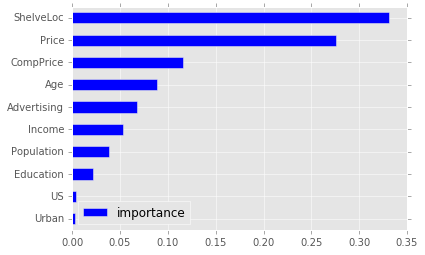

In [10]:
BG.fit(x,y)
vi = BG.feature_importances_
vi = np.reshape(vi,(1,len(vi)))
col = df.drop(['Sales'],axis=1).columns
variables = pd.DataFrame(vi,columns=col,index=['importance']).T
variables = variables.sort_values('importance',ascending=True)
variables.plot.barh()

### (e)

In [11]:
# Random Forest
RF = RandomForestRegressor()
MSE = -1.0*cross_val_score(RF,x,y,cv=10,scoring='mean_squared_error').mean()
print('random forests RMSE = %0.3f' % MSE)

random forests RMSE = 2.740


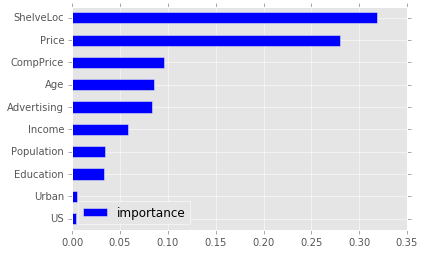

In [12]:
RF.fit(x,y)
vi = RF.feature_importances_
vi = np.reshape(vi,(1,len(vi)))
col = df.drop(['Sales'],axis=1).columns
variables = pd.DataFrame(vi,columns=col,index=['importance']).T
variables = variables.sort_values('importance',ascending=True)
variables.plot.barh()